<a href="https://colab.research.google.com/github/AKO91/Prediction-of-Product-Sales/blob/main/Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Ammar Owaineh


#Project 1 - Part 2


In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


*The data has 8,523 rows and 12 colums, of which 7 are categorical and 5 are numerical*

In [254]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

*The datatypes for each column are showsn above*

In [255]:
df.duplicated().sum()

0

*The data has no duplicates*

In [256]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

*The data has missing values in the Outlet_Size and Item_Weight columns that need to be replaced.*

In [257]:
#df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
#df.head()

*The data in the Outlet_Size column was replaced with the string 'MISSING' because it is an object.*

In [258]:
df['Item_Weight'].mean()

12.857645184135976

In [259]:
#df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
#df.head()

*The missing values in 'Item_Weight' column were replaced with the mean of the column because it is a float and because replacing it with a new value will skew the data.*

In [260]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

*All the missing values has been replaced with placeholders.*

In [261]:
df.value_counts('Outlet_Establishment_Year')

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1999     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [262]:
df.value_counts('Item_Identifier')

Item_Identifier
FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: count, Length: 1559, dtype: int64

In [263]:
df.value_counts('Item_Type')

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [264]:
df.value_counts('Outlet_Identifier')

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [265]:
df.value_counts('Outlet_Size')

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [266]:
df.value_counts('Outlet_Location_Type')

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [267]:
df.value_counts('Outlet_Type')

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [268]:
df.value_counts('Item_Visibility')

Item_Visibility
0.000000    526
0.076975      3
0.076856      2
0.107663      2
0.014048      2
           ... 
0.038729      1
0.038725      1
0.038722      1
0.038721      1
0.328391      1
Name: count, Length: 7880, dtype: int64

In [269]:
df.value_counts('Item_MRP')

Item_MRP
172.0422    7
188.1872    6
196.5084    6
170.5422    6
196.5768    6
           ..
117.1834    1
117.1492    1
117.1124    1
117.0492    1
143.5154    1
Name: count, Length: 5938, dtype: int64

In [270]:
df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [271]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

*All columns were checked for inconsistent data. Inconsistent data was found and replaced in the 'Item_Fat_Content' column.*

In [272]:
item_visibility_mean = df['Item_Visibility'].mean().round(2)
item_visibility_min = df['Item_Visibility'].min()
item_visibility_max = df['Item_Visibility'].max()
print (f'The mean for Item Visibility column is {item_visibility_mean}')
print (f'The minimum for Item Visibility column is {item_visibility_min}')
print (f'The maximum for Item Visibility column is {item_visibility_max}')

The mean for Item Visibility column is 0.07
The minimum for Item Visibility column is 0.0
The maximum for Item Visibility column is 0.328390948


In [273]:
item_mrp_mean = df['Item_MRP'].mean().round(2)
item_mrp_min = df['Item_MRP'].min()
item_mrp_max = df['Item_MRP'].max()
print (f'The mean for Item Maximum Retail Price column is {item_mrp_mean}')
print (f'The minimum for Item Maximum Retail Price column is {item_mrp_min}')
print (f'The maximum for Item Maximum Retail Price column is {item_mrp_max}')



The mean for Item Maximum Retail Price column is 140.99
The minimum for Item Maximum Retail Price column is 31.29
The maximum for Item Maximum Retail Price column is 266.8884


In [274]:
item_outlet_sales_mean = df['Item_Outlet_Sales'].mean().round(2)
item_outlet_sales_min = df['Item_Outlet_Sales'].min()
item_outlet_sales_max = df['Item_Outlet_Sales'].max()
print (f'The mean for Item Outlet Sales column is {item_outlet_sales_mean}')
print (f'The minimum for Item Outlet Sales column is {item_outlet_sales_min}')
print (f'The maximum for Item Outlet Sales column is {item_outlet_sales_max}')


The mean for Item Outlet Sales column is 2181.29
The minimum for Item Outlet Sales column is 33.29
The maximum for Item Outlet Sales column is 13086.9648



*The mean, minimum value, and maximum value of each numerical column are detailed above.*

#Project 1 - Part 3
            


*The following histogram plots will highlight the numerical columns in the dataset which are:*
* Item Weight       
* Item Visibility              
* Item Maximum Retail Price                    
* Item Outlet Sales

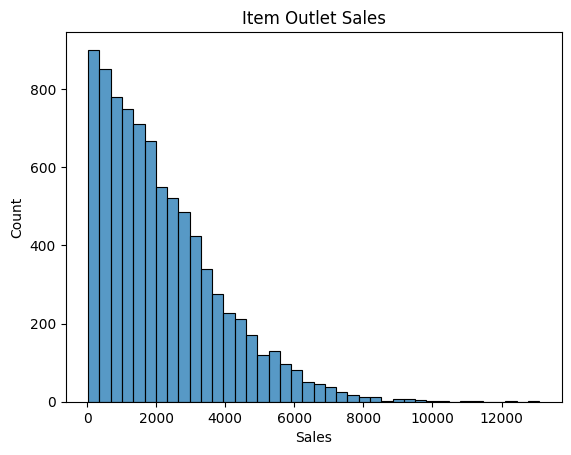

In [275]:
ax = sns.histplot(df['Item_Outlet_Sales'], bins = 40)
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Sales')
plt.show()

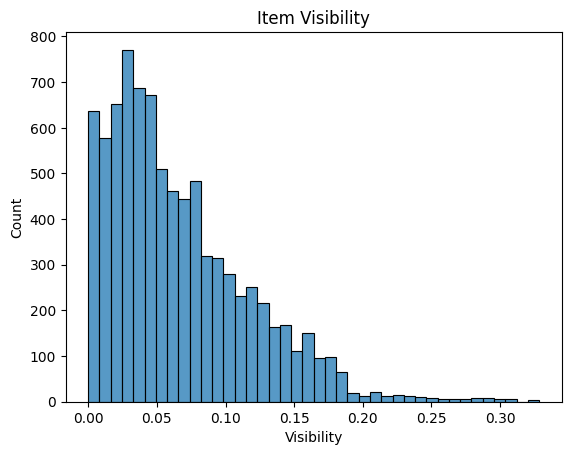

In [276]:
ax = sns.histplot(df['Item_Visibility'], bins = 40)
ax.set_title('Item Visibility')
ax.set_xlabel('Visibility')
plt.show()

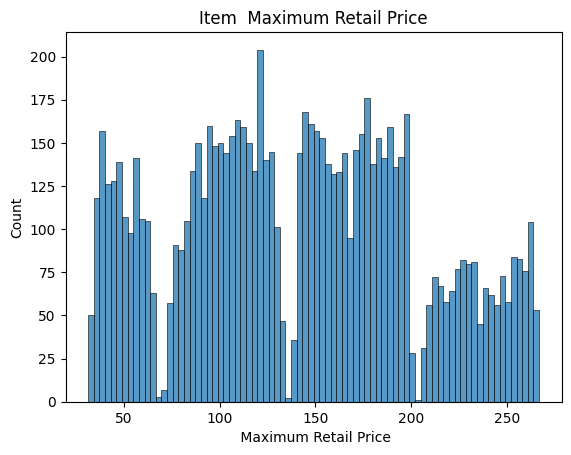

In [277]:
ax = sns.histplot(df['Item_MRP'], bins = 80)
ax.set_title('Item  Maximum Retail Price')
ax.set_xlabel(' Maximum Retail Price')
plt.show()

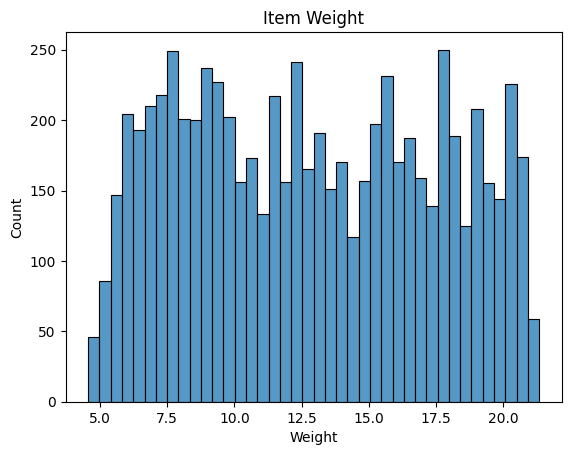

In [278]:
ax = sns.histplot(df['Item_Weight'], bins = 40)
ax.set_title('Item Weight')
ax.set_xlabel('Weight')
plt.show()

*The following boxplots will highlight the numerical columns in the dataset which are:*
* Item Weight       
* Item Visibility              
* Item Maximum Retail Price                    
* Item Outlet Sales
            

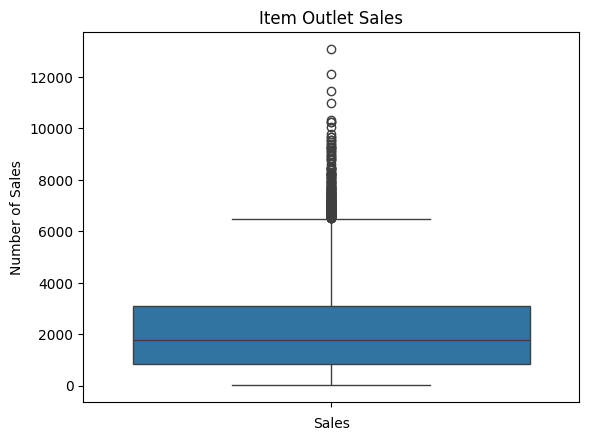

In [279]:
ax =sns.boxplot(df['Item_Outlet_Sales'])
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Number of Sales')
plt.show()

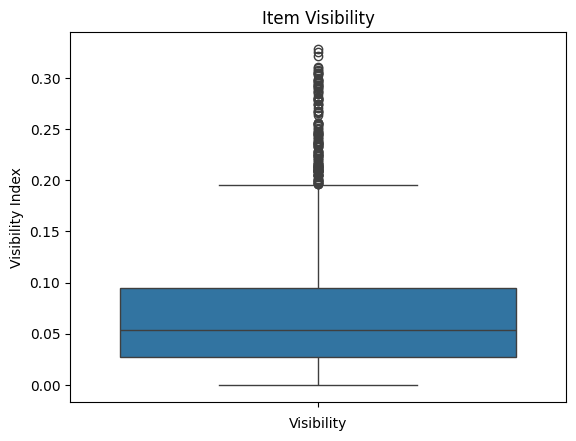

In [280]:
ax =sns.boxplot(df['Item_Visibility'])
ax.set_title('Item Visibility')
ax.set_xlabel('Visibility')
ax.set_ylabel('Visibility Index')
plt.show()

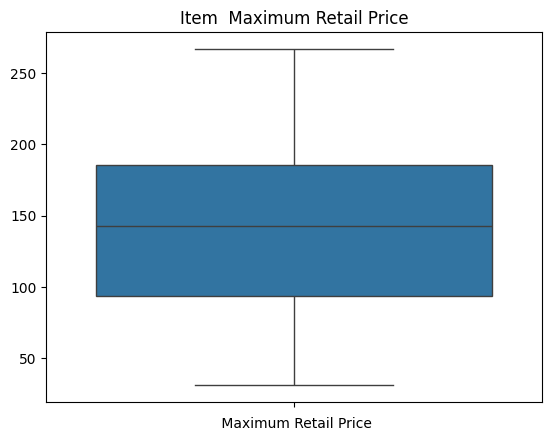

In [281]:
ax = sns.boxplot(df['Item_MRP'])
ax.set_title('Item  Maximum Retail Price')
ax.set_xlabel(' Maximum Retail Price')
ax.set_ylabel('')
plt.show()

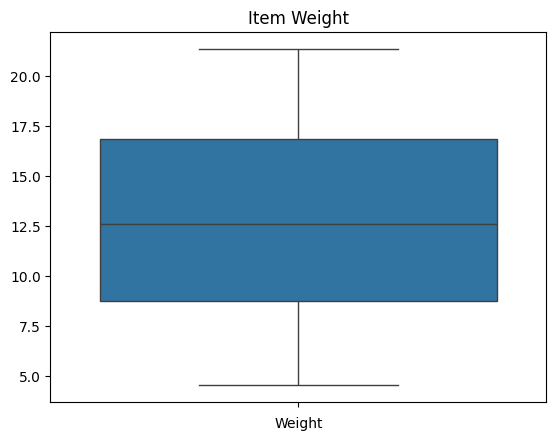

In [282]:
ax = sns.boxplot(df['Item_Weight'])
ax.set_title('Item Weight')
ax.set_xlabel('Weight')
ax.set_ylabel('')
plt.show()

*The following plots will illustrate the number of values in each categorical column, which are:*
* Item Fat Content
* Item Type              
* Outlet Identifier     
* Outlet Establishment Year   
* Outlet Size                
* Outlet Location Type       
* Outlet Type                


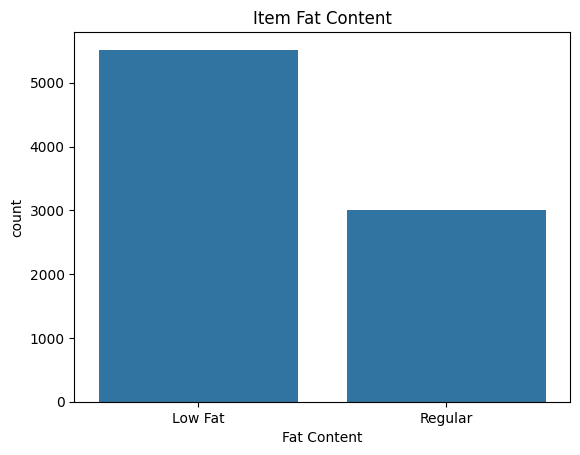

In [283]:
ax =sns.countplot(x = 'Item_Fat_Content', data = df)
ax.set_title('Item Fat Content')
ax.set_xlabel('Fat Content')
plt.show()

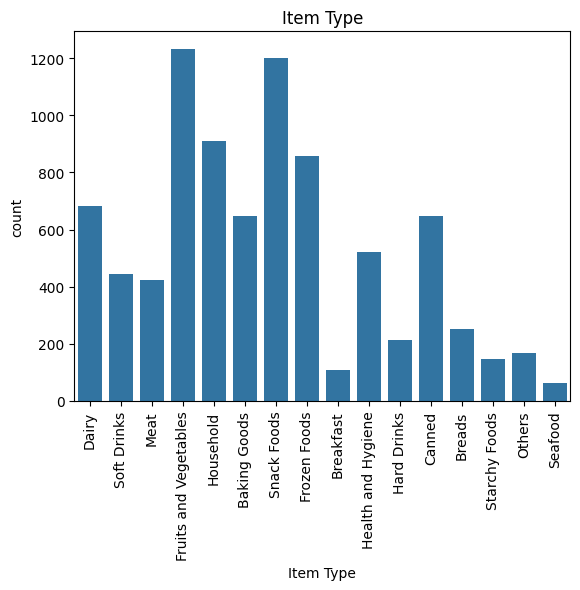

In [284]:
ax =sns.countplot(x = 'Item_Type', data = df)
ax.set_title('Item Type')
ax.set_xlabel('Item Type');
plt.xticks(rotation = 90);

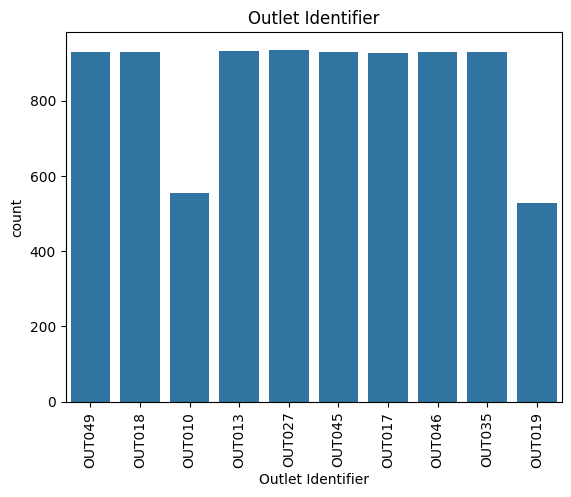

In [285]:
ax =sns.countplot(x = 'Outlet_Identifier', data = df)
ax.set_title('Outlet Identifier')
ax.set_xlabel('Outlet Identifier');
plt.xticks(rotation = 90);

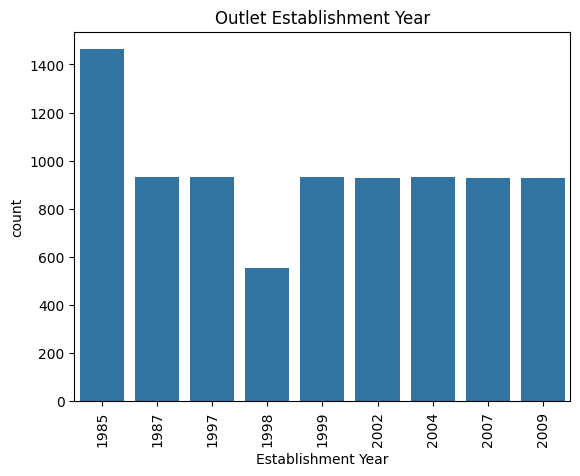

In [286]:
ax =sns.countplot(x = 'Outlet_Establishment_Year', data = df)
ax.set_title('Outlet Establishment Year')
ax.set_xlabel('Establishment Year');
plt.xticks(rotation = 90);

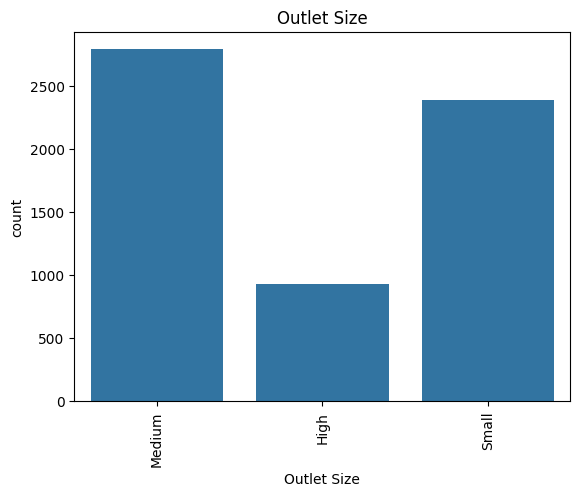

In [287]:
df_nonmissing = df[df['Outlet_Size'] != 'MISSING']
ax =sns.countplot(x = 'Outlet_Size', data = df_nonmissing)
ax.set_title('Outlet Size')
ax.set_xlabel('Outlet Size');
plt.xticks(rotation = 90);

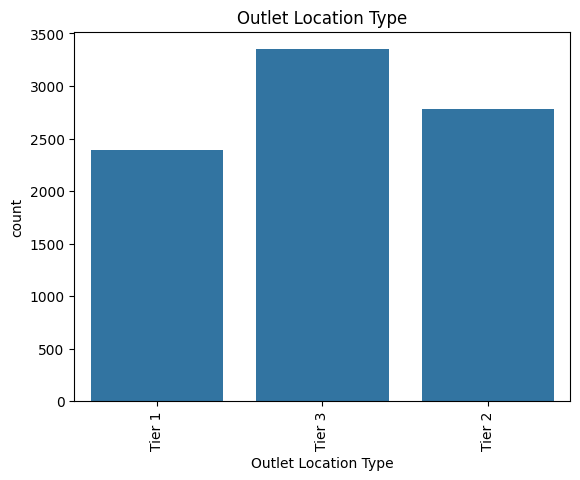

In [288]:
ax =sns.countplot(x = 'Outlet_Location_Type', data = df)
ax.set_title('Outlet Location Type')
ax.set_xlabel('Outlet Location Type');
plt.xticks(rotation = 90);

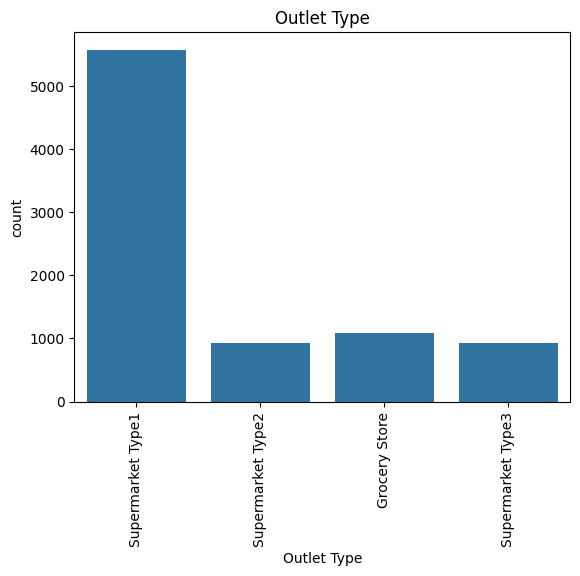

In [289]:
ax =sns.countplot(x = 'Outlet_Type', data = df)
ax.set_title('Outlet Type')
ax.set_xlabel('Outlet Type');
plt.xticks(rotation = 90);

*The following heatmap shows the correlation between numerical columns of the dataset.*

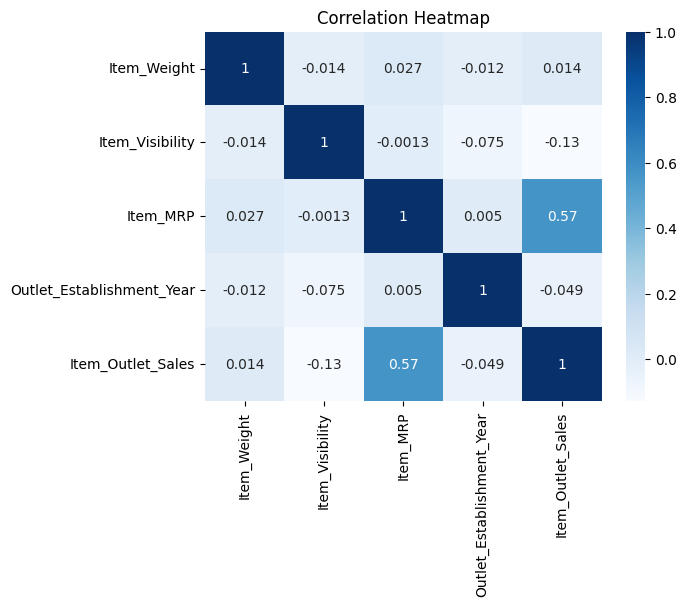

In [290]:
corr= df.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, cmap = 'Blues')
ax.set_title('Correlation Heatmap');


*The heatmap shows low correlation levels between all columns except between the maximum retail price and outlet sale numbers, which have moderate correlation.*

# Project 1 - Part 4

*In this section functions to explore the features of the dataset will be defined and then applied to examine relations between the features of the dataset and the desired column to predict, which is the Item Outlet Sales column.*

In [291]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [292]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [293]:
# Final version of function
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [294]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

In [295]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [296]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<ipython-input-292-cc13acad6abf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


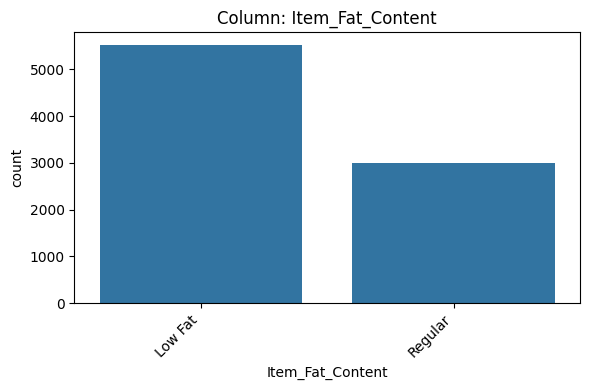

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [297]:
explore_categorical(df, 'Item_Fat_Content');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-292-cc13acad6abf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


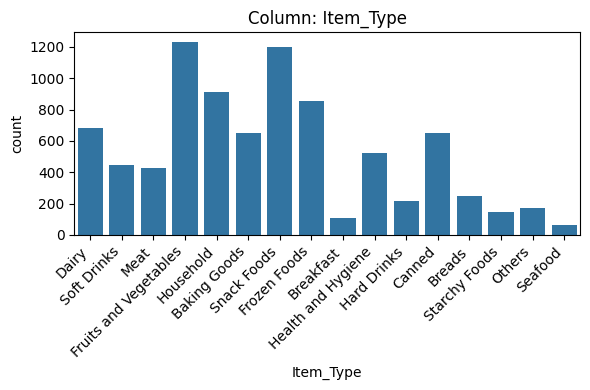

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [298]:
explore_categorical(df, 'Item_Type');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-292-cc13acad6abf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


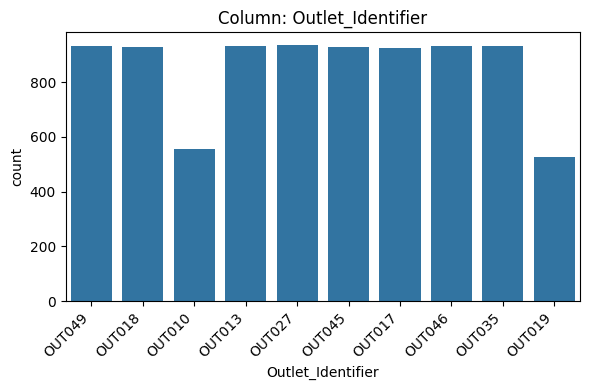

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [299]:
explore_categorical(df, 'Outlet_Identifier');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-292-cc13acad6abf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


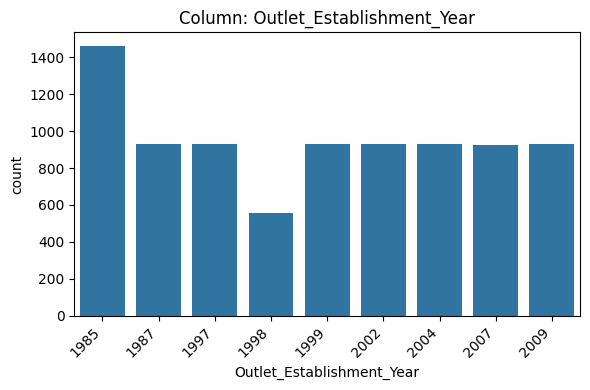

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [300]:
explore_categorical(df, 'Outlet_Establishment_Year');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-292-cc13acad6abf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


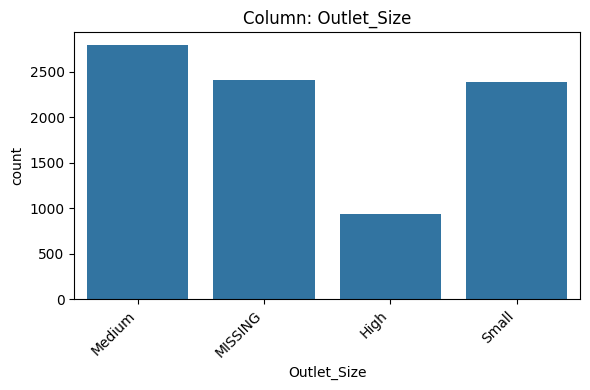

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [301]:
explore_categorical(df, 'Outlet_Size');

* The feature is ordinal.
* The feature has 2410 28.28% NaN values. - NaN values were replaced with the placeholder 'Missing'.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-292-cc13acad6abf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


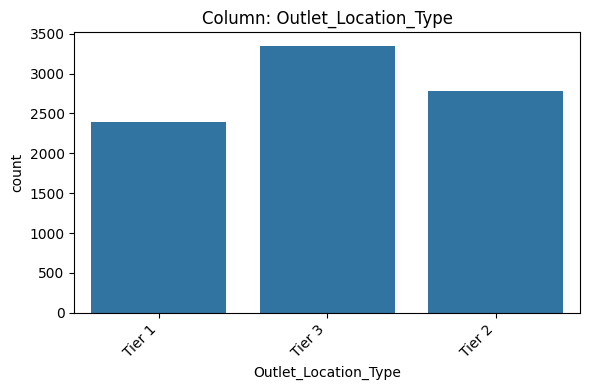

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [302]:
explore_categorical(df, 'Outlet_Location_Type');

* The feature is ordinal.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-292-cc13acad6abf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


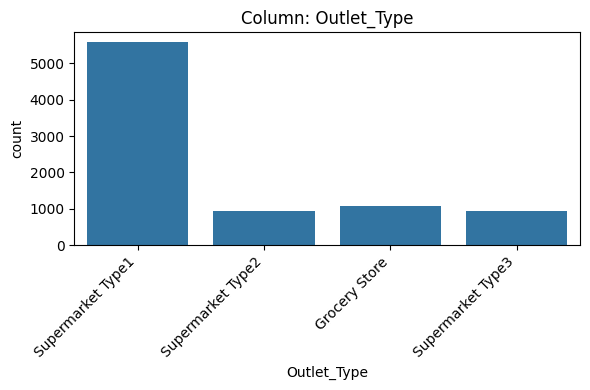

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [303]:
explore_categorical(df, 'Outlet_Type');

* The feature is categorical.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

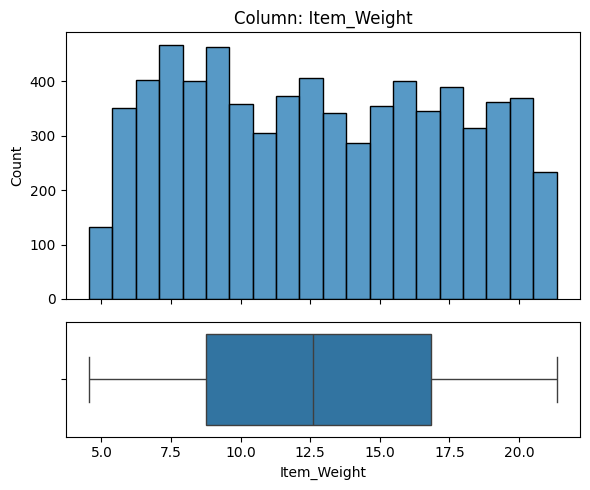

- NaN's Found: 1463 (17.17%)


In [304]:
explore_numeric(df, 'Item_Weight');

In [305]:
df_copy = df.copy()
df_copy['Item_Weight'] = df_copy['Item_Weight'].fillna(df_copy['Item_Weight'].mean())

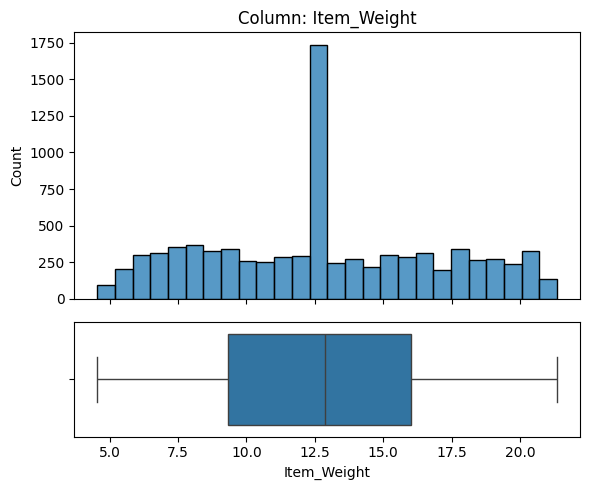

- NaN's Found: 0 (0.0%)


In [324]:
explore_numeric(df_copy, 'Item_Weight');

* The feature is numeric.
* The feature has 1463 NaN values (17.7%), the missing values were replaced with the mean of the item weight column.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There feature can be excluded business case/understanding reason because of the high number of missing values, which lead to skewing the data after being replaced by the mean.

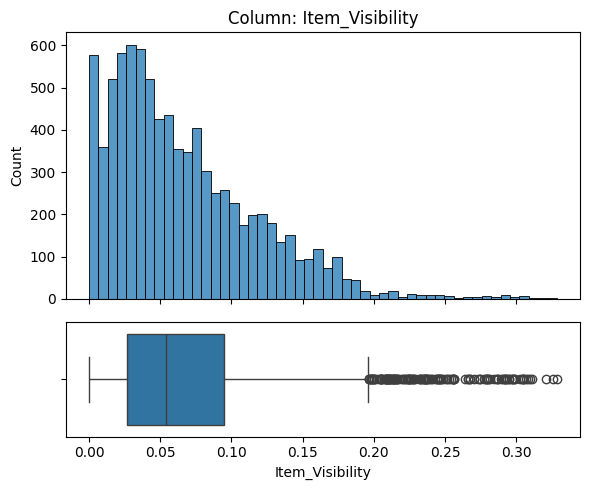

- NaN's Found: 0 (0.0%)


In [308]:
explore_numeric(df, 'Item_Visibility');

* The feature is numeric.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

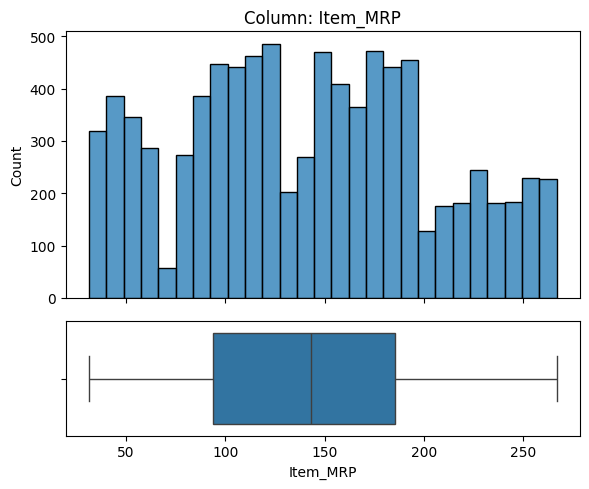

- NaN's Found: 0 (0.0%)


In [309]:
explore_numeric(df, 'Item_MRP');

* The feature is numeric.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

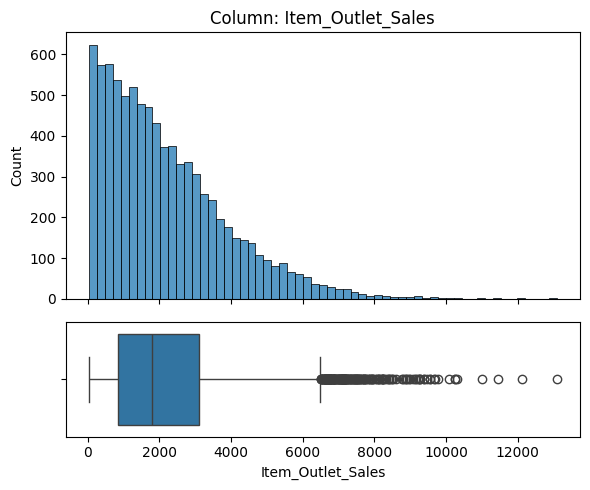

- NaN's Found: 0 (0.0%)


In [310]:
explore_numeric(df, 'Item_Outlet_Sales');

* The feature is numeric.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target because it is the target vector.
* There is no business case/understanding reason to exclude the feature.

<ipython-input-292-cc13acad6abf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


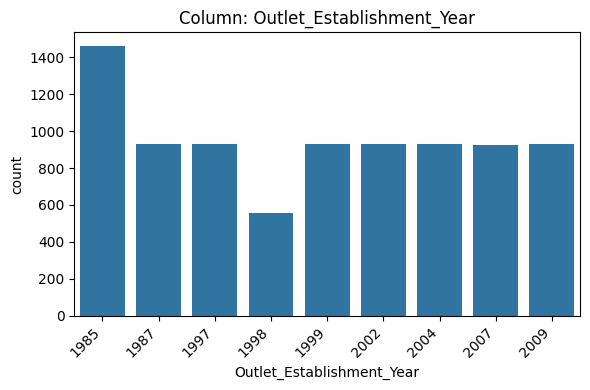

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [325]:
explore_categorical(df, 'Outlet_Establishment_Year');

* The feature is ordinal.
* The feature has no NaN values.
* The feature is not constant or quasi-constant.
* The feature can be determined before viewing the target.
* There is no business case/understanding reason to exclude the feature.

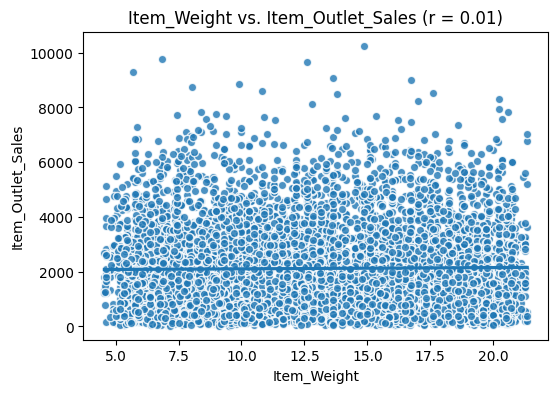

In [326]:
x= 'Item_Weight'
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

* This feature does not seem very helpful for predicting the target, as it does not seem to be correlated with the item outlet sales.
* This feature is not a predictor for the target.

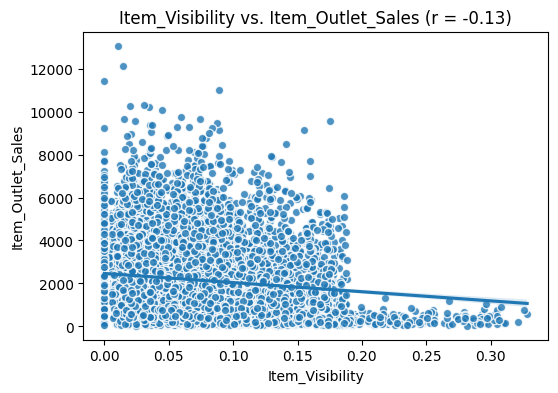

In [327]:
x= 'Item_Visibility'
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

* This feature is helpful for predicting the target, as it correlates negatively ith the item outlet sales.
* This feature can be a minor predictor for the target.

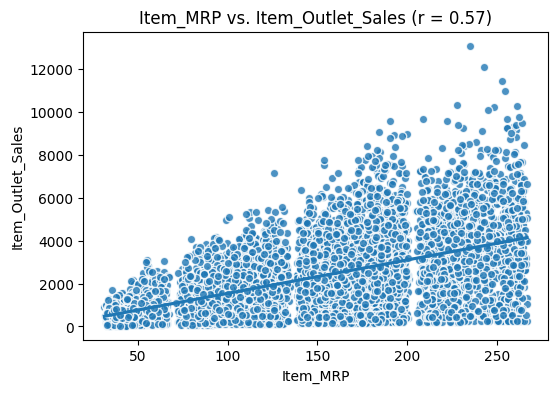

In [328]:
x= 'Item_MRP'
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

* This feature is helpful for predicting the target, as it has moderate positive correlation with the target item outlet sales column.
* This feature can be a significant predictor for the target.

<ipython-input-293-4dc4a5df185a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


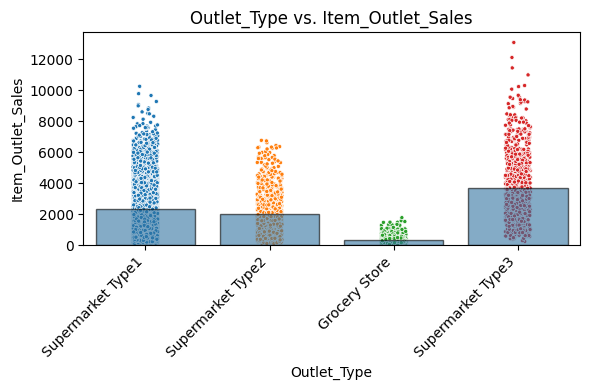

In [316]:
x= 'Outlet_Type'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is helpful for predicting the target, as it shows that grocery stores have notably lower outlet sales than supermarkets.
* This feature can be a useful predictor for the target.

In [317]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [318]:
df['Item_Identifier'].nunique()
df = df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item Weight
Item_Identifier,,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


*The Item Identifier column was set as the index since it has %100 unique values that identify each value in each row.*
*The Item Identifier column is not useful for prediction because it has %100 unique values that does not affect the Item outlet sales.

<ipython-input-293-4dc4a5df185a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


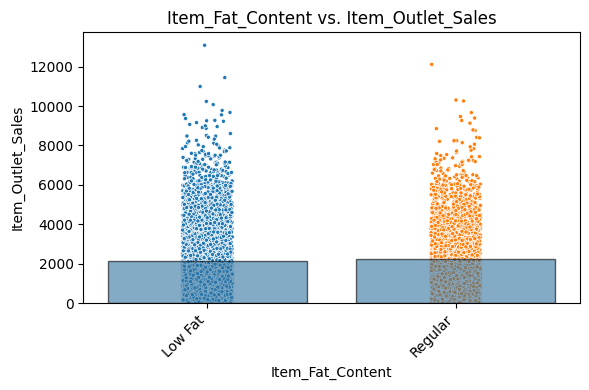

In [319]:
x= 'Item_Fat_Content'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is not helfupl for predicting the target, as the two types of fat content have similar sale numbers.
* This feature is not a useful predictor for the target.

<ipython-input-293-4dc4a5df185a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


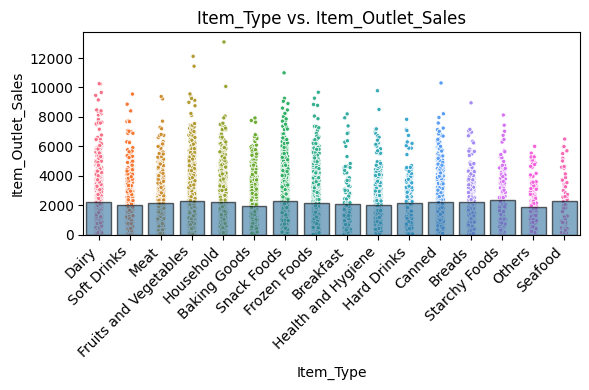

In [320]:
x= 'Item_Type'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is not helfupl for predicting the target, as the types of items have sale numbers within the same range.
* This feature is not a useful predictor for the target.

<ipython-input-293-4dc4a5df185a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


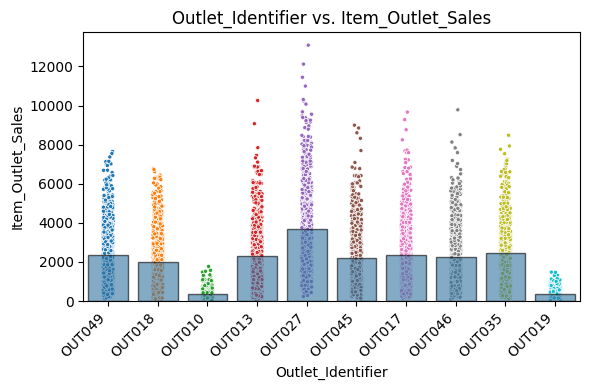

In [321]:
x= 'Outlet_Identifier'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is  helfupl for predicting the target, as there are outlet types that have lower outlet sale numbers, with some having above average sales.
* This feature is a useful predictor for the target.

<ipython-input-293-4dc4a5df185a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


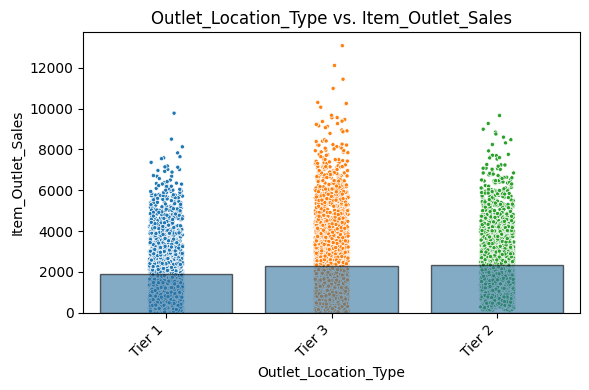

In [322]:
x= 'Outlet_Location_Type'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

* This feature is not helfupl for predicting the target, as there are no significant difference between the outlet types and sales.
* This feature is not a very useful predictor for the target.

<ipython-input-293-4dc4a5df185a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


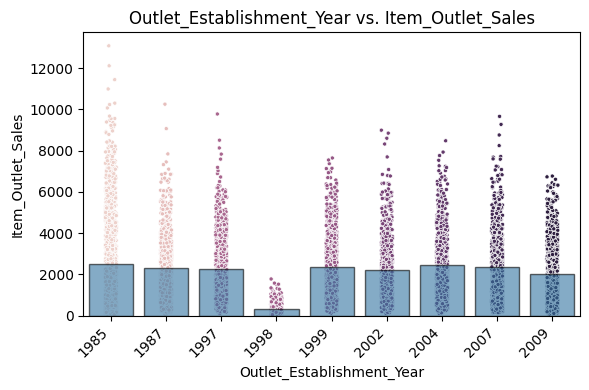

In [323]:
x= 'Outlet_Establishment_Year'
plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),fillna = True);

In [329]:
df['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

* This feature is overall not very helpful for prediction, because there is a smiliar pattern of sales for outlets regardless of establishment year with the exception of 1998. However, this exception could be due to the lower number of outlets established in that year, which has only about %55 of the average of outlets established in other years.
* This feature is a not a useful predictor for the target.